<a href="https://colab.research.google.com/github/gouthamyenugu/Loan-Approval/blob/main/Credit_card_fraud_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
7import pandas as pd
import numpy as np
import po matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.drop(columns='Time',inplace=True)

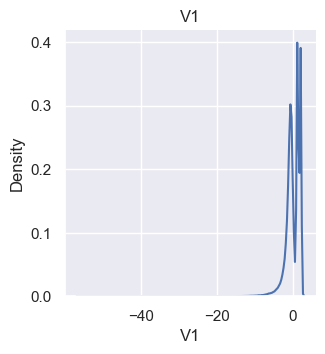

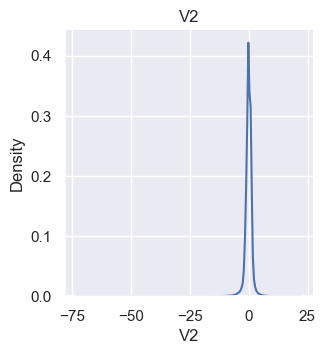

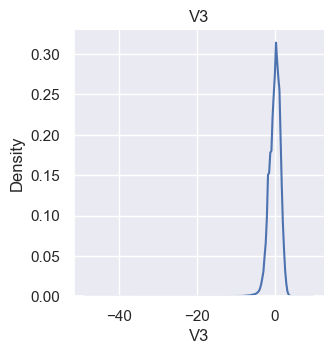

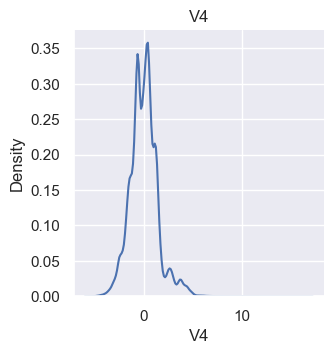

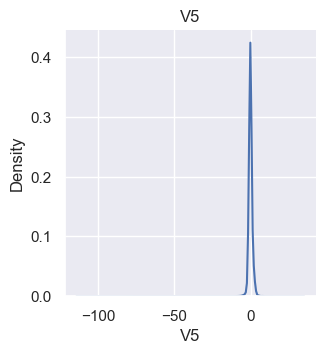

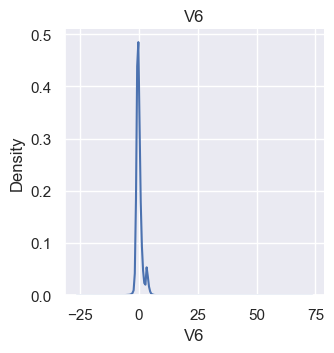

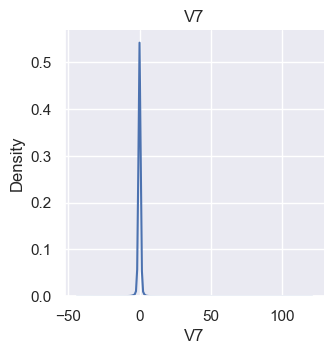

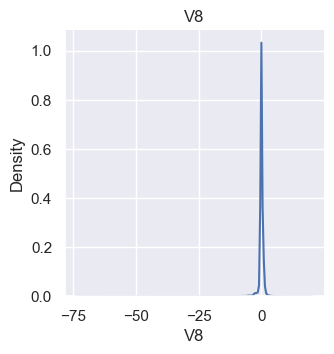

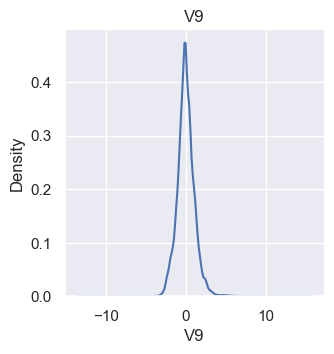

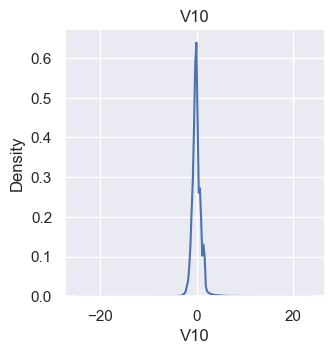

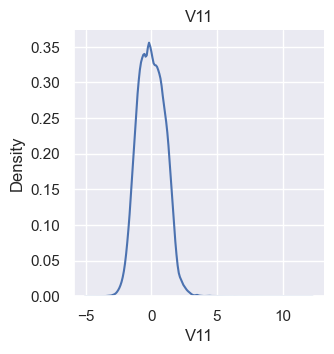

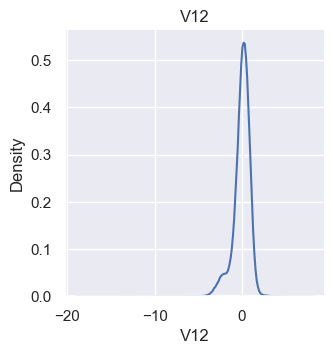

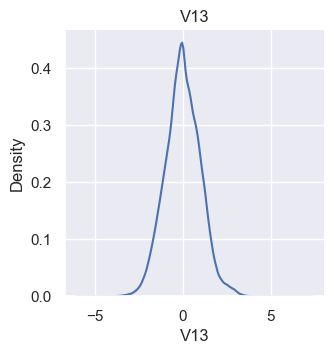

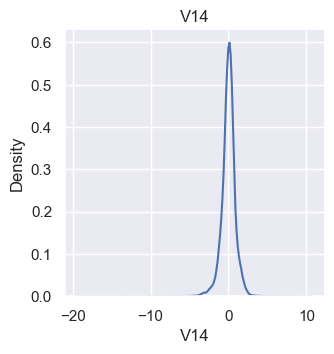

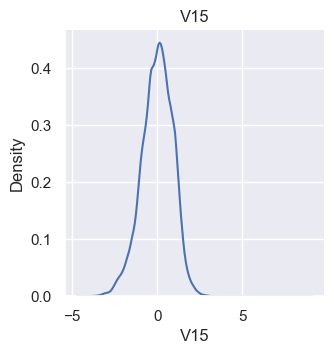

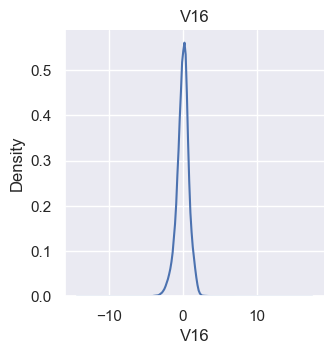

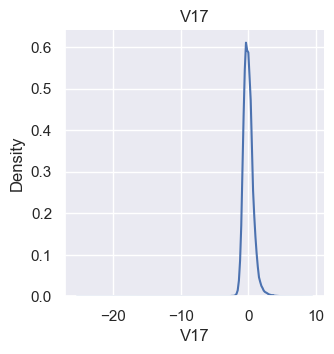

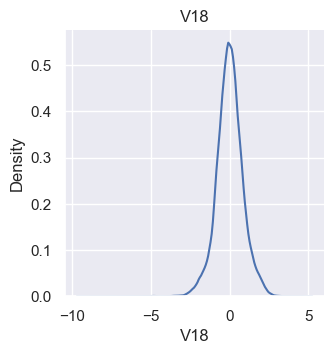

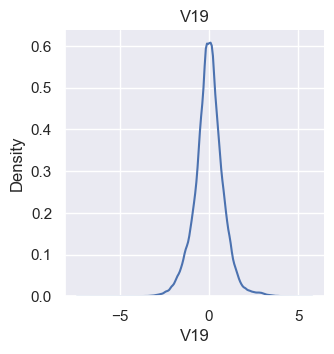

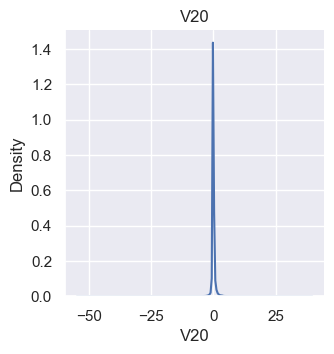

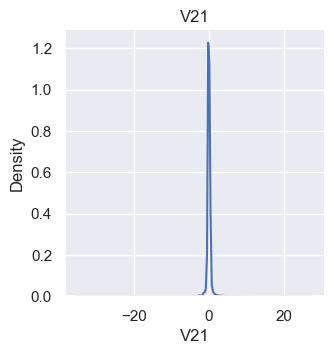

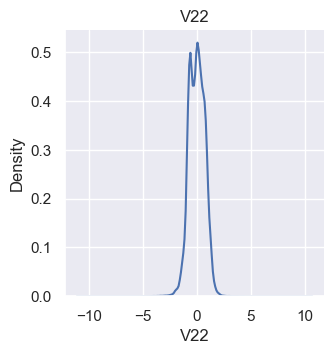

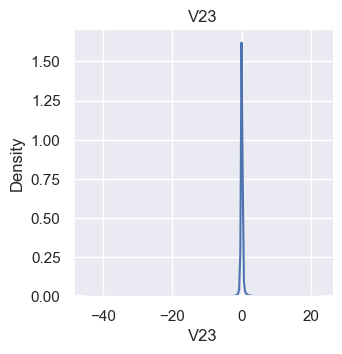

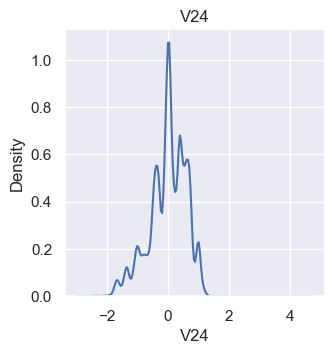

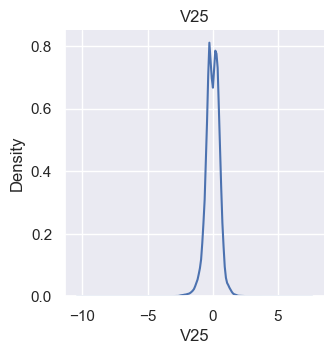

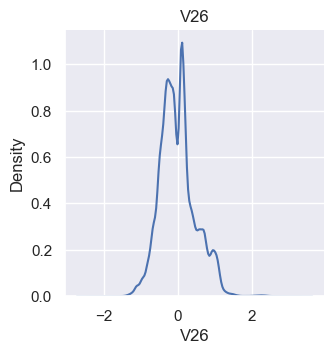

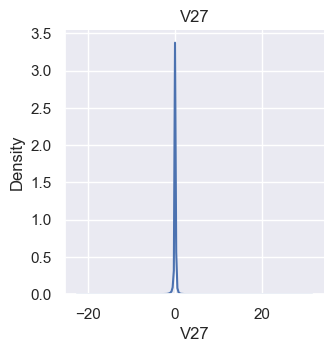

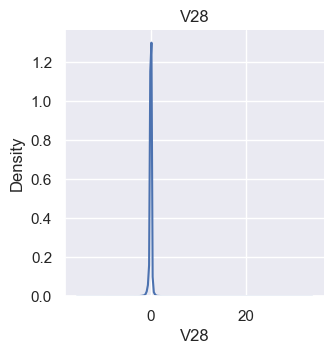

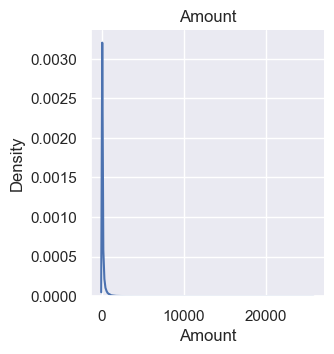

In [ ]:
nums = df.select_dtypes('float')
sns.set()
for i in nums.columns:
    sns.displot(df,x =i,kind='kde',height=3.5,)
    plt.title(i)
    plt.show()

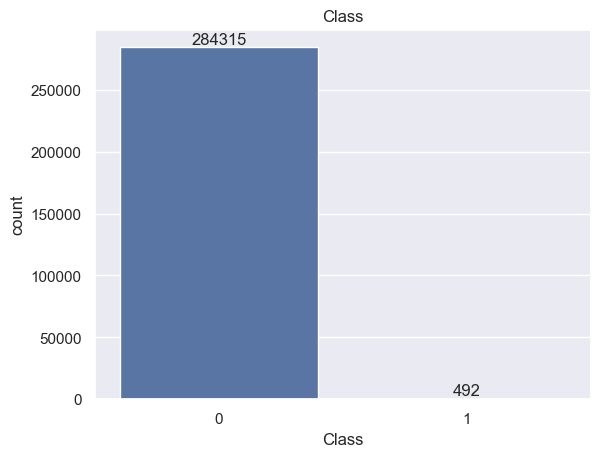

In [ ]:
ax= sns.countplot(data=df,x='Class')
for label in ax.containers:
            ax.bar_label(label)
            plt.title('Class')
            plt.show()

In [ ]:
X = df.drop('Class',axis=1)
y= df['Class']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

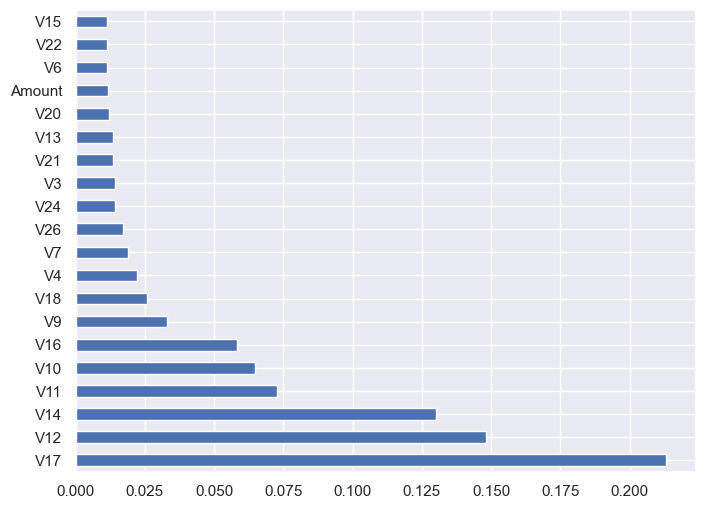

In [ ]:
sns.set()
plt.figure(figsize = (8,6))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.33, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)

# Predicting Train and Test data
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)


In [ ]:
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report
#print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

 Train Accuracy 99.92%
 Test Accuracy 99.91%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93872
           1       0.60      0.85      0.71       115

    accuracy                           1.00     93987
   macro avg       0.80      0.93      0.85     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier(n_estimators=100,max_depth=2,max_features = 5,class_weight = 'balanced_subsample',ccp_alpha =0.01)
ranfor_model = ranfor_clf.fit(X_train, Y_train)


# Predicting Train and Test data
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Train Accuracy 99.62%
Test Accuracy 99.67%
[[93542    23]
 [  283   139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93565
           1       0.86      0.33      0.48       422

    accuracy                           1.00     93987
   macro avg       0.93      0.66      0.74     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
# fit model no training data
XGB_model = XGBClassifier(n_estimators=200,max_depth=10,min_leaves = 3, max_leaves=20, learning_rate=0.007,cv=7)
XGB_model.fit(X_train,Y_train)
# predicting Model
y_train_pred = XGB_model.predict(X_train)
y_pred = XGB_model.predict(X_test)
# model Evaluation
accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_train, y_train_pred))
print(classification_report(Y_test, y_pred))

Train Accuracy: 99.96%
Test Accuracy: 99.95%
[[190481      9]
 [    63    267]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.94      0.74      0.83       162

    accuracy                           1.00     93987
   macro avg       0.97      0.87      0.92     93987
weighted avg       1.00      1.00      1.00     93987

